Implement a Gaze-LLE to keep track of who is looking at who

In [1]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install timm
%pip install RetinaFace
%pip install opencv-python
%pip install retina-face
%pip install tf-keras
%pip install yt-dlp

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.Collecting RetinaFace
  Using cached retinaface-1.1.1-py3-none-any.whl.metadata (2.1 kB)
INFO: pip is looking at multiple versions of retinaface to determine which version is compatible with other requirements. This could take a while.
  Using cached retinaface-1.1.0-py3-none-any.whl.metadata (2.0 kB)
  Using cached retinaface-0.0.6-py3-none-any.whl.metadata (1.6 kB)
  Using cached retinaface-0.0.5-py3-none-any.whl.metadata (1.4 kB)
  Using cached retinaface-0.0.4-py3-none-any.whl.metadata (725 bytes)
  Using cached retinaface-0.0.3-py3-none-any.whl.metadata (725 bytes)
  Using cached retinaface-0.0.2-py3-none-any.whl.metadata (725 bytes)
  Using cached retinaface-0.0.1-py3-none-any.whl.metadata (725 bytes)
INFO: pip is still looking at multiple versions of retinaface to determine which version is compatible with other requirements. This could take a while.

ERROR: Cannot install retinaface==0.0.1, retinaface==0.0.2, retinaface==0.0.3, retinaface==0.0.4, retinaface==0.0.5, retinaface==0.0.6, retinaface==1.1.0 and retinaface==1.1.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch

# load Gaze-LLE model
model, transform = torch.hub.load('fkryan/gazelle', 'gazelle_dinov2_vitl14_inout')

model.eval()
model.to('cpu')

Using cache found in C:\Users\draosy/.cache\torch\hub\fkryan_gazelle_main
Using cache found in C:\Users\draosy/.cache\torch\hub\facebookresearch_dinov2_main
C:\Users\draosy/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
C:\Users\draosy/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
C:\Users\draosy/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


GazeLLE(
  (backbone): DinoV2Backbone(
    (model): DinoVisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
        (norm): Identity()
      )
      (blocks): ModuleList(
        (0-23): 24 x NestedTensorBlock(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): MemEffAttention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): LayerScale()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU(approximate='none')
            (fc2): Linear(in_features=4096, out_features=10

In [4]:
print('hi')

hi


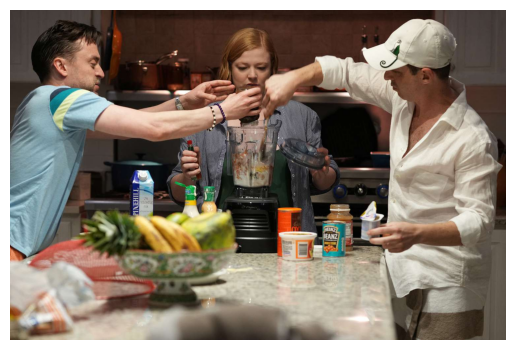

In [5]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
import numpy as np

# load an input image

#image_url = "https://www.looper.com/img/gallery/the-office-funniest-moments-ranked/jim-and-dwights-customer-service-training-1627594561.jpg"
image_url = "https://ew.com/thmb/n5b8Asz4Y5Lp0sSEF7WgS-ESyFc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/succession-finale-052923-ec304aabcbf24a7b9fad891a87f49b74.jpg"
# image_url = "https://i.kym-cdn.com/entries/icons/original/000/045/575/blackcatzoningout_meme.jpg"

try:
    response = requests.get(image_url, stream=True)
    response.raise_for_status()

    image = Image.open(BytesIO(response.content))
    width, height = image.size

    plt.imshow(image)
    plt.axis('off')
    plt.show()

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")

In [6]:
# detect faces
from retinaface import RetinaFace
resp = RetinaFace.detect_faces(np.array(image))
print(resp)
bboxes = [resp[key]['facial_area'] for key in resp.keys()]
print(bboxes)


{'face_1': {'score': np.float64(0.9996663331985474), 'facial_area': [np.int64(668), np.int64(114), np.int64(786), np.int64(266)], 'landmarks': {'right_eye': [np.float32(704.5964), np.float32(177.45291)], 'left_eye': [np.float32(758.9017), np.float32(177.8262)], 'nose': [np.float32(733.08453), np.float32(209.56975)], 'mouth_right': [np.float32(710.18304), np.float32(233.62779)], 'mouth_left': [np.float32(751.0907), np.float32(233.69525)]}}, 'face_2': {'score': np.float64(0.9993746876716614), 'facial_area': [np.int64(1140), np.int64(131), np.int64(1239), np.int64(272)], 'landmarks': {'right_eye': [np.float32(1156.5194), np.float32(178.33797)], 'left_eye': [np.float32(1160.1232), np.float32(186.57892)], 'nose': [np.float32(1137.017), np.float32(211.62555)], 'mouth_right': [np.float32(1164.8771), np.float32(234.76575)], 'mouth_left': [np.float32(1166.3639), np.float32(239.30295)]}}, 'face_3': {'score': np.float64(0.9987086057662964), 'facial_area': [np.int64(172), np.int64(91), np.int64(2

In [7]:
# prepare gazelle input
device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_tensor = transform(image).unsqueeze(0).to(device)
norm_bboxes = [[np.array(bbox) / np.array([width, height, width, height]) for bbox in bboxes]]

input = {
    "images": img_tensor, # [num_images, 3, 448, 448]
    "bboxes": norm_bboxes # [[img1_bbox1, img1_bbox2...], [img2_bbox1, img2_bbox2]...]
}

with torch.no_grad():
    output = model(input)

img1_person1_heatmap = output['heatmap'][0][0] # [64, 64] heatmap
print(img1_person1_heatmap.shape)
if model.inout:
  img1_person1_inout = output['inout'][0][0] # gaze in frame score (if model supports inout prediction)
  print(img1_person1_inout.item())


torch.Size([64, 64])
0.9973506927490234


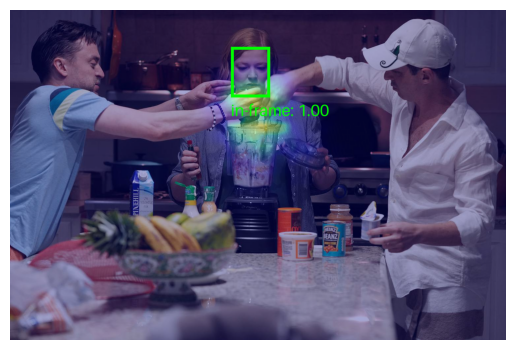

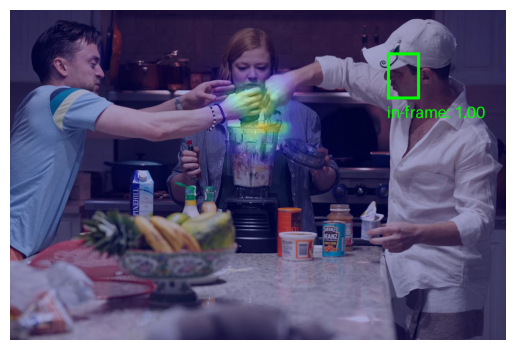

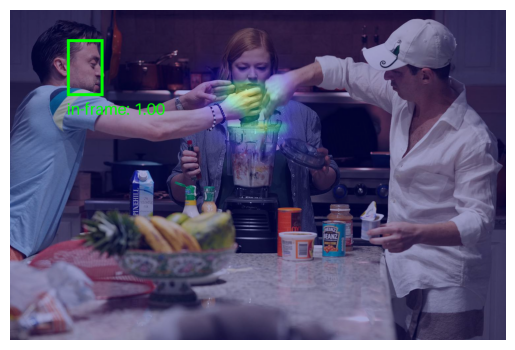

In [8]:
# visualize predicted gaze heatmap for each person and gaze in/out of frame score

def visualize_heatmap(pil_image, heatmap, bbox=None, inout_score=None):
    if isinstance(heatmap, torch.Tensor):
        heatmap = heatmap.detach().cpu().numpy()
    heatmap = Image.fromarray((heatmap * 255).astype(np.uint8)).resize(pil_image.size, Image.Resampling.BILINEAR)
    heatmap = plt.cm.jet(np.array(heatmap) / 255.)
    heatmap = (heatmap[:, :, :3] * 255).astype(np.uint8)
    heatmap = Image.fromarray(heatmap).convert("RGBA")
    heatmap.putalpha(90)
    overlay_image = Image.alpha_composite(pil_image.convert("RGBA"), heatmap)

    if bbox is not None:
        width, height = pil_image.size
        xmin, ymin, xmax, ymax = bbox
        draw = ImageDraw.Draw(overlay_image)
        draw.rectangle([xmin * width, ymin * height, xmax * width, ymax * height], outline="lime", width=int(min(width, height) * 0.01))

        if inout_score is not None:
          text = f"in-frame: {inout_score:.2f}"
          text_width = draw.textlength(text)
          text_height = int(height * 0.01)
          text_x = xmin * width
          text_y = ymax * height + text_height
          draw.text((text_x, text_y), text, fill="lime", font=ImageFont.load_default(size=int(min(width, height) * 0.05)))
    return overlay_image

for i in range(len(bboxes)):
  plt.figure()
  plt.imshow(visualize_heatmap(image, output['heatmap'][0][i], norm_bboxes[0][i], inout_score=output['inout'][0][i] if output['inout'] is not None else None))
  plt.axis('off')
  plt.show()



Loading Gaze-LLE model...


Using cache found in /Users/draosy/.cache/torch/hub/fkryan_gazelle_main
Using cache found in /Users/draosy/.cache/torch/hub/facebookresearch_dinov2_main


Model and transform loaded successfully.


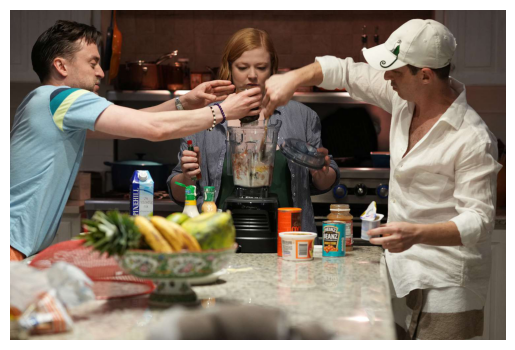

Bounding Boxes: [[np.int32(694), np.int32(43), np.int32(755), np.int32(104)], [np.int32(124), np.int32(84), np.int32(307), np.int32(267)], [np.int32(665), np.int32(124), np.int32(800), np.int32(259)], [np.int32(595), np.int32(293), np.int32(644), np.int32(342)], [np.int32(688), np.int32(339), np.int32(737), np.int32(388)], [np.int32(1255), np.int32(270), np.int32(1496), np.int32(511)], [np.int32(752), np.int32(414), np.int32(777), np.int32(439)], [np.int32(918), np.int32(438), np.int32(952), np.int32(472)], [np.int32(367), np.int32(565), np.int32(393), np.int32(591)], [np.int32(356), np.int32(483), np.int32(435), np.int32(562)], [np.int32(365), np.int32(573), np.int32(394), np.int32(602)], [np.int32(423), np.int32(547), np.int32(493), np.int32(617)], [np.int32(1008), np.int32(514), np.int32(1110), np.int32(616)], [np.int32(1001), np.int32(615), np.int32(1067), np.int32(681)], [np.int32(931), np.int32(633), np.int32(1027), np.int32(729)], [np.int32(1046), np.int32(608), np.int32(1153), 

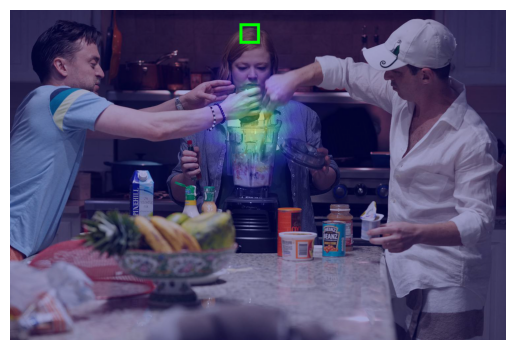

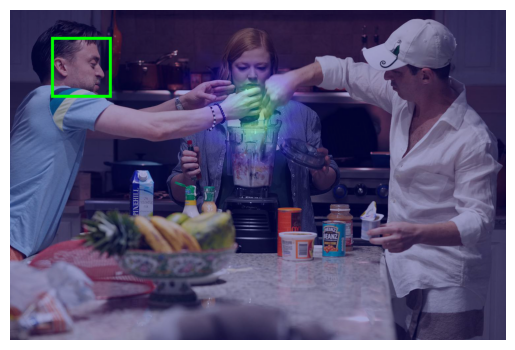

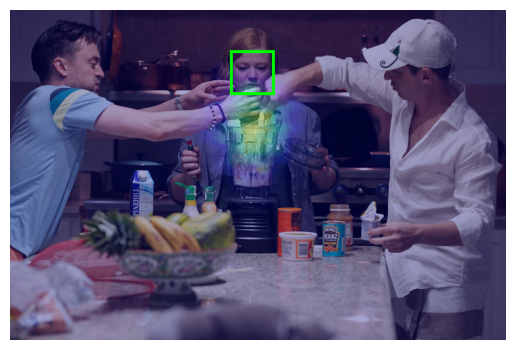

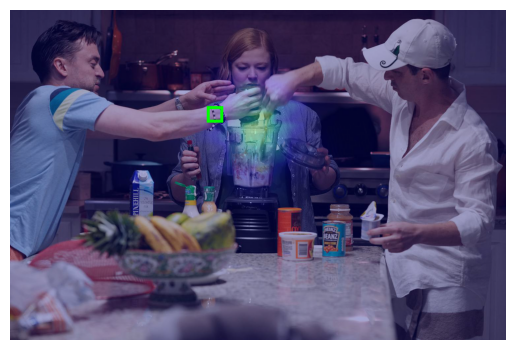

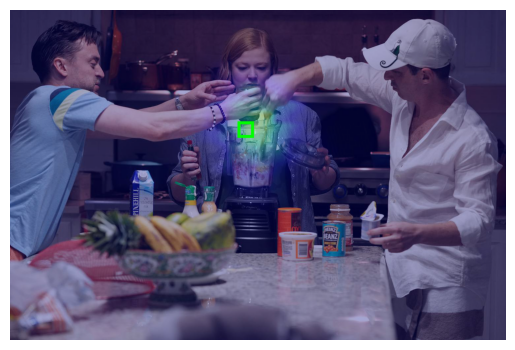

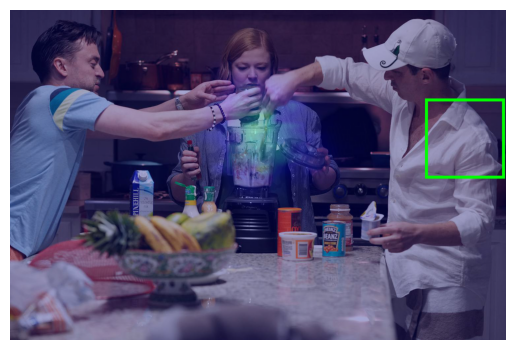

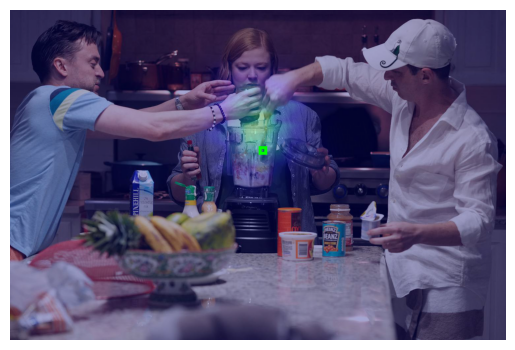

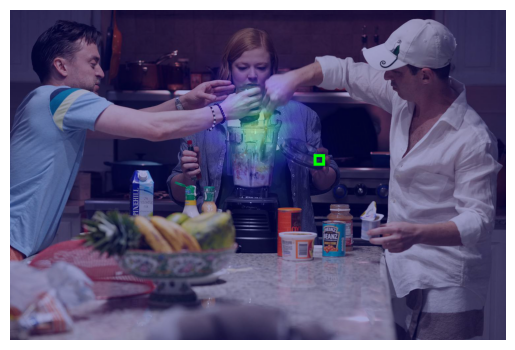

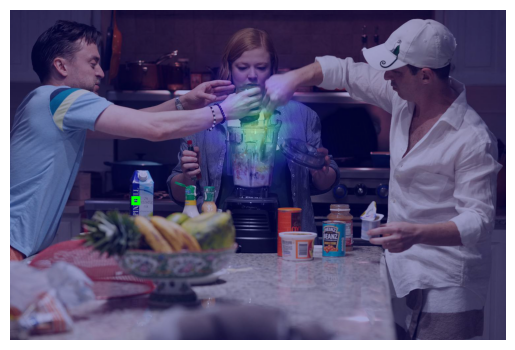

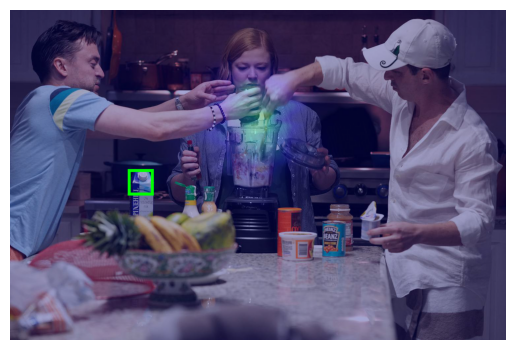

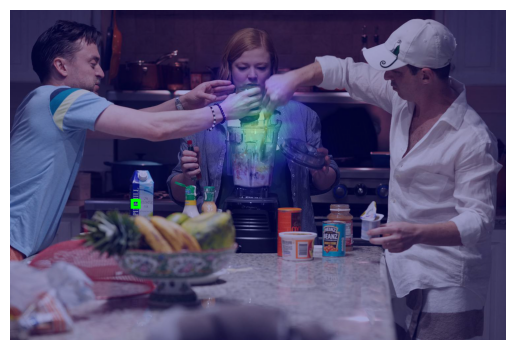

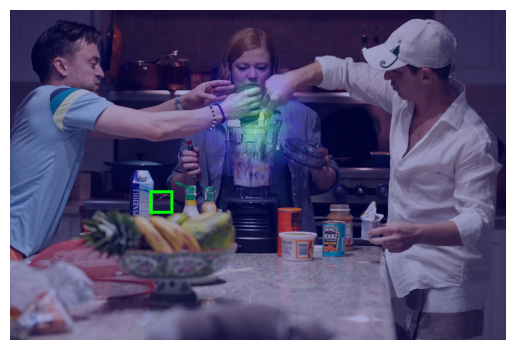

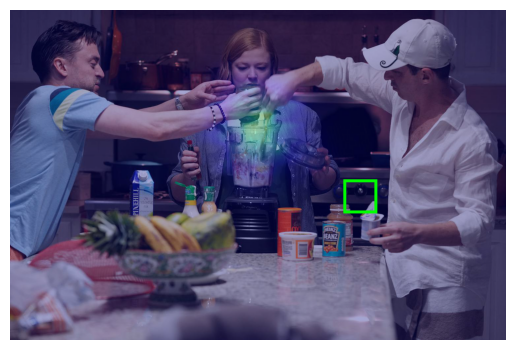

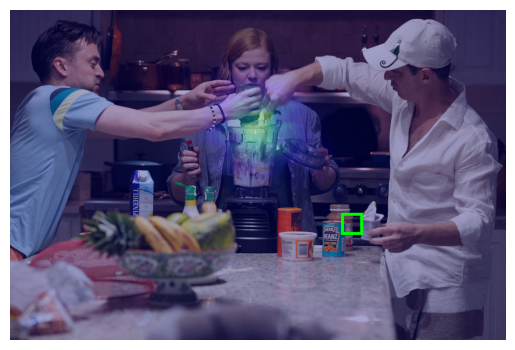

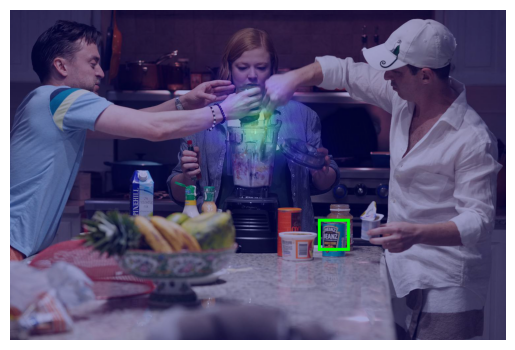

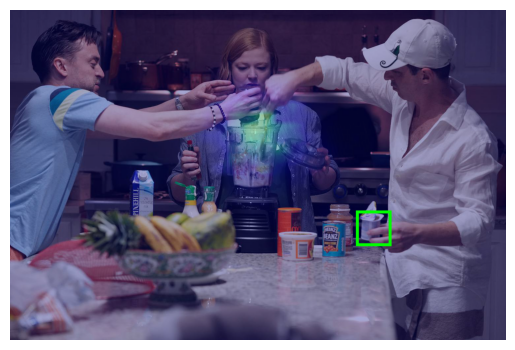

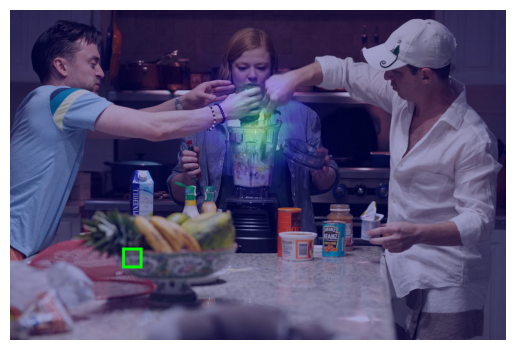

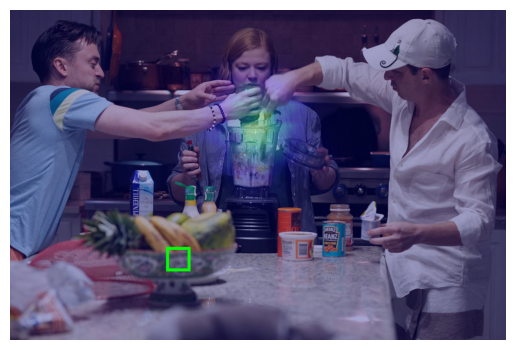

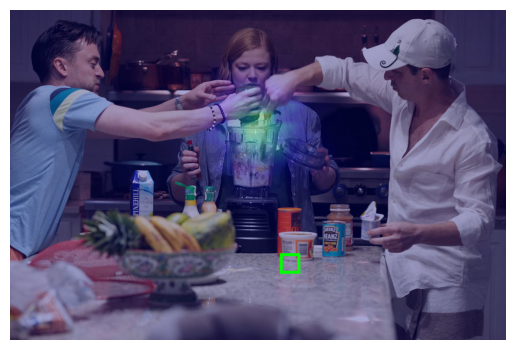

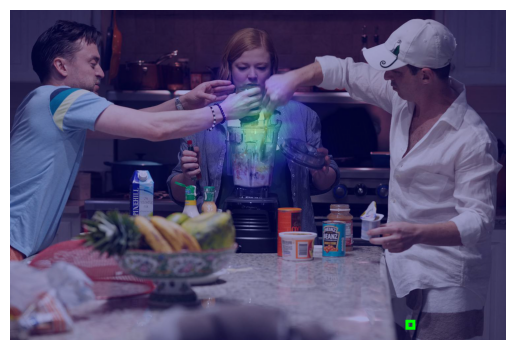

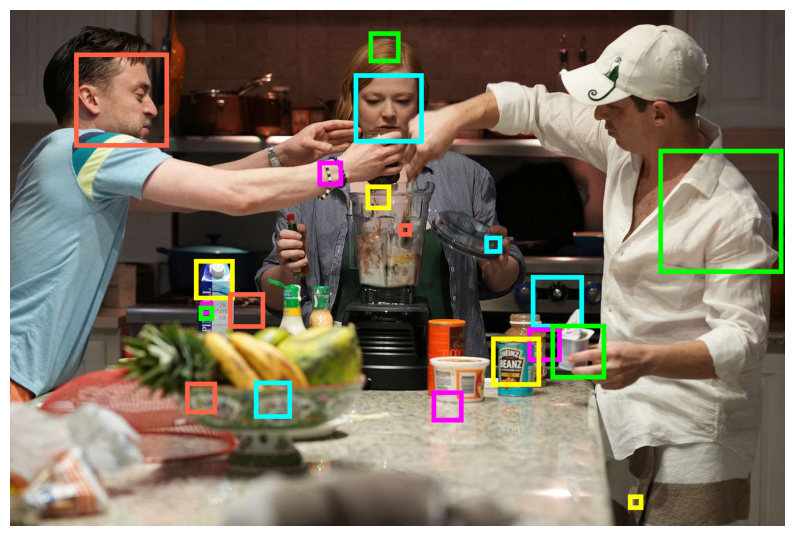

In [7]:
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torchvision.transforms as T
import requests
from io import BytesIO
import cv2

# Configuration constants for CascadeClassifier
CASCADE_PATH = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
SCALE_FACTOR = 1.1
MIN_NEIGHBORS = 5
MIN_FACE_SIZE = (30, 30)

# Function to initialize the Gaze-LLE model and transform
def initialize_gaze_model():
    print("Loading Gaze-LLE model...")
    model, _ = torch.hub.load('fkryan/gazelle', 'gazelle_dinov2_vitb14', trust_repo=True)
    model.eval()  # Set the model to evaluation mode
    # Define transform for preprocessing
    transform = T.Compose([
        T.Resize((448, 448)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    print("Model and transform loaded successfully.")
    return model, transform

# Detect faces using OpenCV's CascadeClassifier
def detect_faces_with_opencv(image):
    """Detect faces and get bounding boxes using OpenCV."""
    face_cascade = cv2.CascadeClassifier(CASCADE_PATH)
    frame = np.array(image)  # Convert PIL image to numpy array
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray_frame,
        scaleFactor=1.01,  # Reduce for more sensitivity
        minNeighbors=3,    # Lower for more detections
        minSize=(20, 20)   # Smaller minimum face size
    )
    bboxes = [[x, y, x + w, y + h] for (x, y, w, h) in faces]  # Convert to [x1, y1, x2, y2]
    return bboxes


# Visualization functions
def visualize_heatmap(pil_image, heatmap, bbox=None, inout_score=None):
    if isinstance(heatmap, torch.Tensor):
        heatmap = heatmap.detach().cpu().numpy()
    heatmap = Image.fromarray((heatmap * 255).astype(np.uint8)).resize(pil_image.size, Image.Resampling.BILINEAR)
    heatmap = plt.cm.jet(np.array(heatmap) / 255.)
    heatmap = (heatmap[:, :, :3] * 255).astype(np.uint8)
    heatmap = Image.fromarray(heatmap).convert("RGBA")
    heatmap.putalpha(90)
    overlay_image = Image.alpha_composite(pil_image.convert("RGBA"), heatmap)

    if bbox is not None:
        width, height = pil_image.size
        xmin, ymin, xmax, ymax = bbox
        draw = ImageDraw.Draw(overlay_image)
        draw.rectangle([xmin * width, ymin * height, xmax * width, ymax * height], outline="lime", width=int(min(width, height) * 0.01))

        if inout_score is not None:
            text = f"in-frame: {inout_score:.2f}"
            draw.text((xmin * width, ymax * height + 10), text, fill="lime")
    return overlay_image

def visualize_all(pil_image, heatmaps, bboxes, inout_scores, inout_thresh=0.5):
    colors = ['lime', 'tomato', 'cyan', 'fuchsia', 'yellow']
    overlay_image = pil_image.convert("RGBA")
    draw = ImageDraw.Draw(overlay_image)
    width, height = pil_image.size

    for i in range(len(bboxes)):
        bbox = bboxes[i]
        xmin, ymin, xmax, ymax = bbox
        color = colors[i % len(colors)]
        draw.rectangle([xmin * width, ymin * height, xmax * width, ymax * height], outline=color, width=int(min(width, height) * 0.01))

        if inout_scores is not None:
            inout_score = inout_scores[i]
            text = f"in-frame: {inout_score:.2f}"
            draw.text((xmin * width, ymax * height + 10), text, fill=color)

        if inout_scores is not None and inout_score > inout_thresh:
            heatmap = heatmaps[i]
            heatmap_np = heatmap.detach().cpu().numpy()
            max_index = np.unravel_index(np.argmax(heatmap_np), heatmap_np.shape)
            gaze_target_x = max_index[1] / heatmap_np.shape[1] * width
            gaze_target_y = max_index[0] / heatmap_np.shape[0] * height
            bbox_center_x = ((xmin + xmax) / 2) * width
            bbox_center_y = ((ymin + ymax) / 2) * height

            draw.ellipse([(gaze_target_x-5, gaze_target_y-5), (gaze_target_x+5, gaze_target_y+5)], fill=color)
            draw.line([(bbox_center_x, bbox_center_y), (gaze_target_x, gaze_target_y)], fill=color)

    return overlay_image

# Main pipeline
def main():
    # Initialize the model and transform
    model, transform = initialize_gaze_model()

    # Load a test image
    image_url = "https://ew.com/thmb/n5b8Asz4Y5Lp0sSEF7WgS-ESyFc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/succession-finale-052923-ec304aabcbf24a7b9fad891a87f49b74.jpg"
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()

        image = Image.open(BytesIO(response.content)).convert("RGB")
        width, height = image.size

        plt.imshow(image)
        plt.axis('off')
        plt.show()

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return

    # Detect faces using OpenCV
    bboxes = detect_faces_with_opencv(image)  # Use OpenCV for face detection
    print("Bounding Boxes:", bboxes)

    if not bboxes:
        print("No faces detected in the image.")
        return

    # Prepare Gaze-LLE input
    img_tensor = transform(image).unsqueeze(0).to("cpu")
    norm_bboxes = [[np.array(bbox) / np.array([width, height, width, height]) for bbox in bboxes]]

    input_data = {
        "images": img_tensor,
        "bboxes": norm_bboxes
    }

    with torch.no_grad():
        output = model(input_data)

    # Visualize results
    for i in range(len(bboxes)):
        plt.figure()
        plt.imshow(visualize_heatmap(image, output['heatmap'][0][i], norm_bboxes[0][i], inout_score=output['inout'][0][i] if output['inout'] is not None else None))
        plt.axis('off')
        plt.show()

    # Combined visualization
    plt.figure(figsize=(10, 10))
    plt.imshow(visualize_all(image, output['heatmap'][0], norm_bboxes[0], output['inout'][0] if output['inout'] is not None else None, inout_thresh=0.5))
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


In [11]:
#playing around with highlighted most gazed face function outside

import cv2
import torch
import numpy as np
from PIL import Image
from retinaface import RetinaFace
from yt_dlp import YoutubeDL
import matplotlib.pyplot as plt

# Function to calculate gaze distance (can use Euclidean distance between average gaze point and face center)
def calculate_gaze_distance(gaze_point, face_center):
    return np.linalg.norm(np.array(gaze_point) - np.array(face_center))

# Function to highlight the most gazed face
def highlight_most_gazed_face(frame, bounding_boxes, gaze_points):
    gaze_centers = []
    min_distance = float('inf')
    most_gazed_face = None
    
    # Calculate the average gaze position
    avg_gaze_x = int(np.mean([p[0] for p in gaze_points]))
    avg_gaze_y = int(np.mean([p[1] for p in gaze_points]))

    for i, bbox in enumerate(bounding_boxes):
        x1, y1, x2, y2 = bbox
        face_center_x = (x1 + x2) // 2
        face_center_y = (y1 + y2) // 2
        gaze_center = (avg_gaze_x, avg_gaze_y)
        
        # Calculate the distance from the average gaze position to the face center
        distance = calculate_gaze_distance(gaze_center, (face_center_x, face_center_y))
        
        if distance < min_distance:
            min_distance = distance
            most_gazed_face = i
    
    # Highlight the most gazed face
    if most_gazed_face is not None:
        x1, y1, x2, y2 = bounding_boxes[most_gazed_face]
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3) 
        cv2.putText(frame, "DIVA", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    return frame

# Function to fetch video URL using yt-dlp
def get_video_url(youtube_url):
    ydl_opts = {'quiet': True, 'format': 'best[ext=mp4]'}
    with YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(youtube_url, download=False)
        return info['url']

# Function to visualize the gaze heatmap and gaze target
def visualize_gaze(frame, heatmap, bbox):
    height, width, _ = frame.shape
    x1, y1, x2, y2 = bbox

    # Scale heatmap to image size
    heatmap_resized = cv2.resize(heatmap.cpu().numpy(), (width, height))
    heatmap_resized = cv2.normalize(heatmap_resized, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_TURBO)

    # Convert frame to float32 before blending
    frame_float = frame.astype(np.float32)

    #Add transparency to heatmap
    overlay = cv2.addWeighted(frame, 0.95, heatmap_colored, 0.05, 0)

    # Convert back to uint8 for display
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    # Draw bounding box
    cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Find gaze target (highest probability in heatmap)
    max_idx = np.unravel_index(np.argmax(heatmap_resized), heatmap_resized.shape)
    gaze_x, gaze_y = max_idx[1], max_idx[0]
    cv2.circle(overlay, (gaze_x, gaze_y), radius=5, color=(255, 0, 0), thickness=-1)
    cv2.line(overlay, ((x1 + x2) // 2, (y1 + y2) // 2), (gaze_x, gaze_y), (0, 255, 255), 2)

    return overlay

# Add a frame skip interval
FRAME_SKIP = 20  # Process every 5th frame

# Process YouTube live stream
youtube_url = "https://youtu.be/Db4THOCexbI?si=-HdwTBsk7AbEwWmf"  # Replace with your URL
#kai cenat ice spice: "https://youtube.com/shorts/6L9-jXcf_XU?si=yNFDNkpSEPGiMuD5" 
#ishowloneliness "https://youtu.be/qWOJRlA9cns?si=hnftx6ljfUXQxocV"
#NINA NINA NINA "https://youtu.be/Db4THOCexbI?si=-HdwTBsk7AbEwWmf"
#awkward cut scenes  "https://youtu.be/OA4jquZqIeM?si=h-pdDql1nNwX7ncS"
video_url = get_video_url(youtube_url)
cap = cv2.VideoCapture(video_url)

if not cap.isOpened():
    print("Error: Unable to open the YouTube video stream.")
else:
    print("Processing YouTube video. Press 'q' to quit.")
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video or error reading the video stream.")
            break

        # Skip frames
        if frame_count % FRAME_SKIP != 0:
            frame_count += 1
            continue

        # Face detection with RetinaFace
        detections = RetinaFace.detect_faces(frame)
        if detections:
            bounding_boxes = [detections[key]["facial_area"] for key in detections.keys()]

            # Prepare Gaze-LLE inputs
            pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            input_tensor = transform(pil_image).unsqueeze(0)
            norm_bboxes = [[np.array(bbox) / np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]]) for bbox in bounding_boxes]]

            input_data = {
                "images": input_tensor,
                "bboxes": norm_bboxes
            }

            # Predict gaze heatmaps
            with torch.no_grad():
                output = model(input_data)

            gaze_points = []

            # Visualize results
            for i, bbox in enumerate(bounding_boxes):
                heatmap = output["heatmap"][0][i]
                max_idx = np.unravel_index(np.argmax(heatmap.cpu().numpy()), heatmap.shape)
                gaze_x, gaze_y = max_idx[1], max_idx[0]
                gaze_points.append((gaze_x, gaze_y)) #tracks where everyone is looking
                frame = visualize_gaze(frame, heatmap, bbox)
            frame = highlight_most_gazed_face(frame, bounding_boxes, gaze_points)

        # Display frame with gaze visualization
        cv2.imshow("Gaze-LLE on YouTube Live Stream", frame)

        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Exiting video processing.")
            break

        frame_count += 1

cap.release()
cv2.destroyAllWindows()


Processing YouTube video. Press 'q' to quit.
Exiting video processing.


In [14]:

import cv2
import torch
import numpy as np
from PIL import Image
from retinaface import RetinaFace
from yt_dlp import YoutubeDL
import matplotlib.pyplot as plt

# Function to fetch video URL using yt-dlp
def get_video_url(youtube_url):
    ydl_opts = {'quiet': True, 'format': 'best[ext=mp4]'}
    with YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(youtube_url, download=False)
        return info['url']

# Function to visualize the gaze heatmap and gaze target
def visualize_gaze(frame, heatmap, bbox):
    height, width, _ = frame.shape
    x1, y1, x2, y2 = bbox

    # Scale heatmap to image size
    heatmap_resized = cv2.resize(heatmap.cpu().numpy(), (width, height))
    heatmap_resized = cv2.normalize(heatmap_resized, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_TURBO)

    # Convert frame to float32 before blending
    frame_float = frame.astype(np.float32)

    #Add transparency to heatmap
    overlay = cv2.addWeighted(frame, 0.95, heatmap_colored, 0.05, 0)

    # Convert back to uint8 for display
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    # Draw bounding box
    cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Find gaze target (highest probability in heatmap)
    max_idx = np.unravel_index(np.argmax(heatmap_resized), heatmap_resized.shape)
    gaze_x, gaze_y = max_idx[1], max_idx[0]
    cv2.circle(overlay, (gaze_x, gaze_y), radius=5, color=(255, 0, 0), thickness=-1)
    cv2.line(overlay, ((x1 + x2) // 2, (y1 + y2) // 2), (gaze_x, gaze_y), (0, 255, 255), 2)

    return overlay

# Add a frame skip interval
FRAME_SKIP = 20  # Process every 5th frame

# Process YouTube live stream
youtube_url = "https://youtu.be/Db4THOCexbI?si=-HdwTBsk7AbEwWmf"  # Replace with your URL
#kai cenat ice spice: "https://youtube.com/shorts/6L9-jXcf_XU?si=yNFDNkpSEPGiMuD5" 
#ishowloneliness "https://youtu.be/qWOJRlA9cns?si=hnftx6ljfUXQxocV"
#NINA NINA NINA "https://youtu.be/Db4THOCexbI?si=-HdwTBsk7AbEwWmf"
#awkward cut scenes  "https://youtu.be/OA4jquZqIeM?si=h-pdDql1nNwX7ncS"
video_url = get_video_url(youtube_url)
cap = cv2.VideoCapture(video_url)

if not cap.isOpened():
    print("Error: Unable to open the YouTube video stream.")
else:
    print("Processing YouTube video. Press 'q' to quit.")
    frame_count = 0
    prevface = None
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video or error reading the video stream.")
            break

        # Skip frames
        if frame_count % FRAME_SKIP != 0:
            frame_count += 1
            continue

        # Face detection with RetinaFace
        detections = RetinaFace.detect_faces(frame)
        if detections:
            bounding_boxes = [detections[key]["facial_area"] for key in detections.keys()]

            # Prepare Gaze-LLE inputs
            pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            input_tensor = transform(pil_image).unsqueeze(0)
            norm_bboxes = [[np.array(bbox) / np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]]) for bbox in bounding_boxes]]

            input_data = {
                "images": input_tensor,
                "bboxes": norm_bboxes
            }

            # Predict gaze heatmaps
            with torch.no_grad():
                output = model(input_data)

            gaze_points = []
            face_centers = []

            # Visualize results
            for i, bbox in enumerate(bounding_boxes):
                heatmap = output["heatmap"][0][i]
                max_idx = np.unravel_index(np.argmax(heatmap.cpu().numpy()), heatmap.shape)
                gaze_x, gaze_y = max_idx[1], max_idx[0]
                gaze_points.append((gaze_x, gaze_y)) #tracks where everyone is looking
                frame = visualize_gaze(frame, heatmap, bbox)

                # Compute face center
                x1, y1, x2, y2 = bbox
                face_centers.append(((x1 + x2) // 2, (y1 + y2) // 2))
                
            most_gazed_face = None
            max_gaze_count = 0  # Track which face gets the most gaze points
            min_distance = float('inf')  # Track closest face to avg gaze

            if gaze_points:
                #avg_gaze_x = int(np.mean([p[0] for p in gaze_points]))
                #avg_gaze_y = int(np.mean([p[1] for p in gaze_points]))
                 # Compute weighted average gaze position (helps avoid skew)
                gaze_x_values = [p[0] for p in gaze_points]
                gaze_y_values = [p[1] for p in gaze_points]
                avg_gaze_x = int(np.median(gaze_x_values))  # Use median instead of mean to avoid skew
                avg_gaze_y = int(np.median(gaze_y_values))

                for idx, (x1, y1, x2, y2) in enumerate(bounding_boxes):
                    face_center_x = (x1 + x2) // 2
                    face_center_y = (y1 + y2) // 2
        
                    # Count how many gaze points fall inside this face
                    gaze_count = sum(x1 <= gx <= x2 and y1 <= gy <= y2 for gx, gy in gaze_points)
            
                    # Find the closest face to the avg gaze if no points fall inside
                    distance = np.linalg.norm(np.array([face_center_x, face_center_y]) - np.array([avg_gaze_x, avg_gaze_y]))
        
                    if gaze_count > max_gaze_count:
                        max_gaze_count = gaze_count
                        most_gazed_face = idx  # Update most gazed face
    
                    elif gaze_count == 0 and distance < min_distance:
                        min_distance = distance
                        most_gazed_face = idx  # Closest face to avg gaze if no direct gaze

            # for idx, (face_x, face_y) in enumerate(face_centers):
                #distance = np.linalg.norm(np.array([face_x, face_y]) - np.array([avg_gaze_x, avg_gaze_y]))
                #if distance < min_distance:
                    #min_distance = distance
                    #most_gazed_face = idx  # Index of the most gazed face
                    
            if most_gazed_face is not None:

                if prevface is not None and prevface != most_gazed_face:
                # Remove the old box if it's different from the new most gazed face
                    prev_x1, prev_y1, prev_x2, prev_y2 = bounding_boxes[prevface]
                    cv2.rectangle(frame, (prev_x1, prev_y1), (prev_x2, prev_y2), (0, 0, 0), 3)  # Clear the old box
                x1, y1, x2, y2 = bounding_boxes[most_gazed_face]
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)  # Highlight most gazed face, red, this is BGR btw
                cv2.putText(frame, "DIVA", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
                print(most_gazed_face)

        # Display frame with gaze visualization
        cv2.imshow("Gaze-LLE on YouTube Live Stream", frame)

        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Exiting video processing.")
            break

        frame_count += 1

cap.release()
cv2.destroyAllWindows()


Processing YouTube video. Press 'q' to quit.
0
0
3
0
0
1
4
5
4
4
4
3
0
1
Exiting video processing.
